<a href="https://colab.research.google.com/github/cindykhris/SummerInternship2020/blob/master/SummerInternship2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pine Biotech Summer Reasearch

**Cindy Pino**


Abstract: In this study, we will analyze the gene expression differnt coronaviruses (CoVs) infections to determine how each virus differs when causing a disease. Here, we focuses the analysis on samples from SARS-CoV-1, MERS, and SARS-CoV-2. 
The raw sequence data (fastq files) for the SARS-CoV-1 and MERS infections were downloaded from GEO [GSE56192](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE56192), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the SARS-CoV-2 infections were downloaded from GEO ([GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)), including their corresponding Mock-treated controls). 

In this Jupyter notebook, I will use both R and Python to analyze three viruses: MERS, SARS-CoV-1, amd SARS-CoV-2

##Using R and Python in the same Notebook
First, let's active R magic. Don't forget to use %%R before running a R code 


---

In [ ]:
#active R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


##Import all the folders we will need for this files (R and Python)

###Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###R

In [ ]:
%%R
#builtins()
install.packages('dplyr')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 935654 bytes (913 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

## SARS-CoV
Severe Acute Respiratory Syndrom Coronavirus (SARS-CoV) was first identified in 20013 (WHO). 

In [ ]:
%%R
df = read.table('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes_FPKM.txt',skip = 1, header = TRUE)


In [ ]:
%%R
#Set the data portion portion (everything except the labels)
df = df[,-1] #remove a column
df=as.matrix(df)

In [ ]:
%%R
names(df) <- NULL



In [ ]:

%%R
#Remove NAs from dataset
datanew <- na.exclude(df)

In [ ]:

%%R

#Remove zeroes
datanew <- filter(df,variable ==0)

R[write to console]: Error in filter(df, variable == 0) : object 'variable' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> filter




Error in filter(df, variable == 0) : object 'variable' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> filter


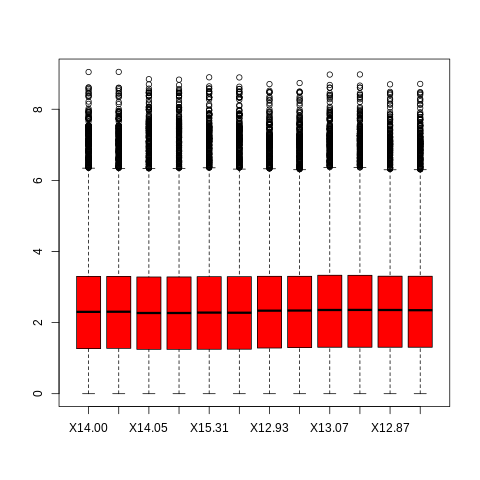

In [ ]:

%%R
#Log transformation
logdata <- log(df+1)
boxplot(logdata, col = 'red')

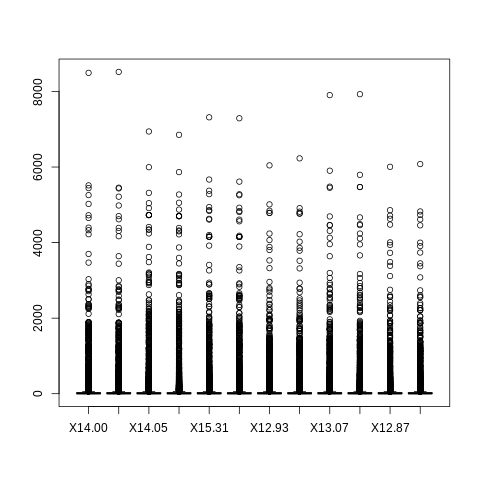

In [ ]:
%%R
#Basic Settings:

colors <- c(rep('red',6),rep('blue',3),rep('green',2),rep('gray',2))
boxplot(df,col='red')

In [ ]:
%%R
#Descriptive statistics
summary(df)

     X14.17            X14.05            X13.24            X15.31        
 Min.   :   0.00   Min.   :   0.00   Min.   :   0.00   Min.   :   0.000  
 1st Qu.:   2.58   1st Qu.:   2.48   1st Qu.:   2.47   1st Qu.:   2.487  
 Median :   9.03   Median :   8.67   Median :   8.67   Median :   8.785  
 Mean   :  45.98   Mean   :  49.29   Mean   :  49.19   Mean   :  47.898  
 3rd Qu.:  26.11   3rd Qu.:  25.63   3rd Qu.:  25.67   3rd Qu.:  25.885  
 Max.   :8518.84   Max.   :6941.47   Max.   :6853.46   Max.   :7316.370  
     X14.33            X12.93             X13.14             X13.07       
 Min.   :   0.00   Min.   :   0.000   Min.   :   0.000   Min.   :   0.00  
 1st Qu.:   2.49   1st Qu.:   2.610   1st Qu.:   2.660   1st Qu.:   2.69  
 Median :   8.75   Median :   9.325   Median :   9.365   Median :   9.53  
 Mean   :  47.84   Mean   :  43.011   Mean   :  43.016   Mean   :  45.78  
 3rd Qu.:  25.90   3rd Qu.:  26.163   3rd Qu.:  26.170   3rd Qu.:  26.99  
 Max.   :7291.31   Max.   :6044.

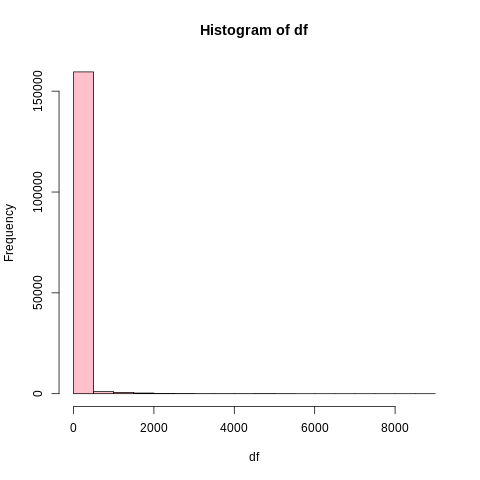

In [ ]:
%%R
hist(df, col='pink')


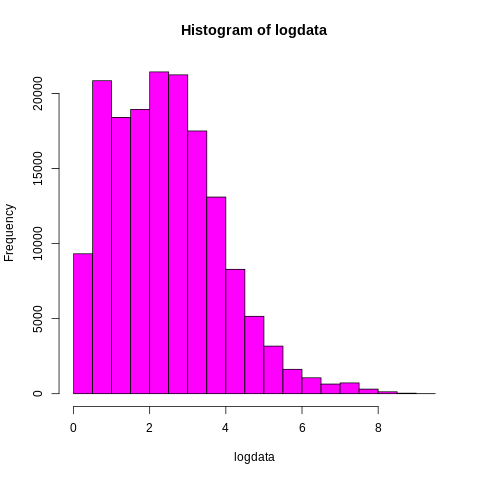

In [ ]:
%%R
hist(logdata, col='magenta')